In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'dark')

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder

## Import Data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
df_combined = train.append(test)
df_combined

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN


## First Look

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [7]:
train.shape

(8693, 14)

In [8]:
test.shape

(4277, 13)

In [9]:
train.duplicated().sum()

0

In [10]:
test.duplicated().sum()

0

In [11]:
df_combined.duplicated().sum()

0

In [12]:
train_null = pd.DataFrame({'Missing Values': train.isnull().sum(),
                          'Percentage': round(train.isnull().sum()/len(train)*100, 2)})

train_null

,Missing Values,Percentage
PassengerId,0,0.00
HomePlanet,201,2.31
CryoSleep,217,2.50
Cabin,199,2.29
Destination,182,2.09
Age,179,2.06
VIP,203,2.34
RoomService,181,2.08
FoodCourt,183,2.11
ShoppingMall,208,2.39


In [13]:
test_null = pd.DataFrame({'Missing Values': test.isnull().sum(),
                          'Percentage': round(test.isnull().sum()/len(test)*100, 2)})

test_null

,Missing Values,Percentage
PassengerId,0,0.00
HomePlanet,87,2.03
CryoSleep,93,2.17
Cabin,100,2.34
Destination,92,2.15
Age,91,2.13
VIP,93,2.17
RoomService,82,1.92
FoodCourt,106,2.48
ShoppingMall,98,2.29


## EDA

`Passenger Distribution`

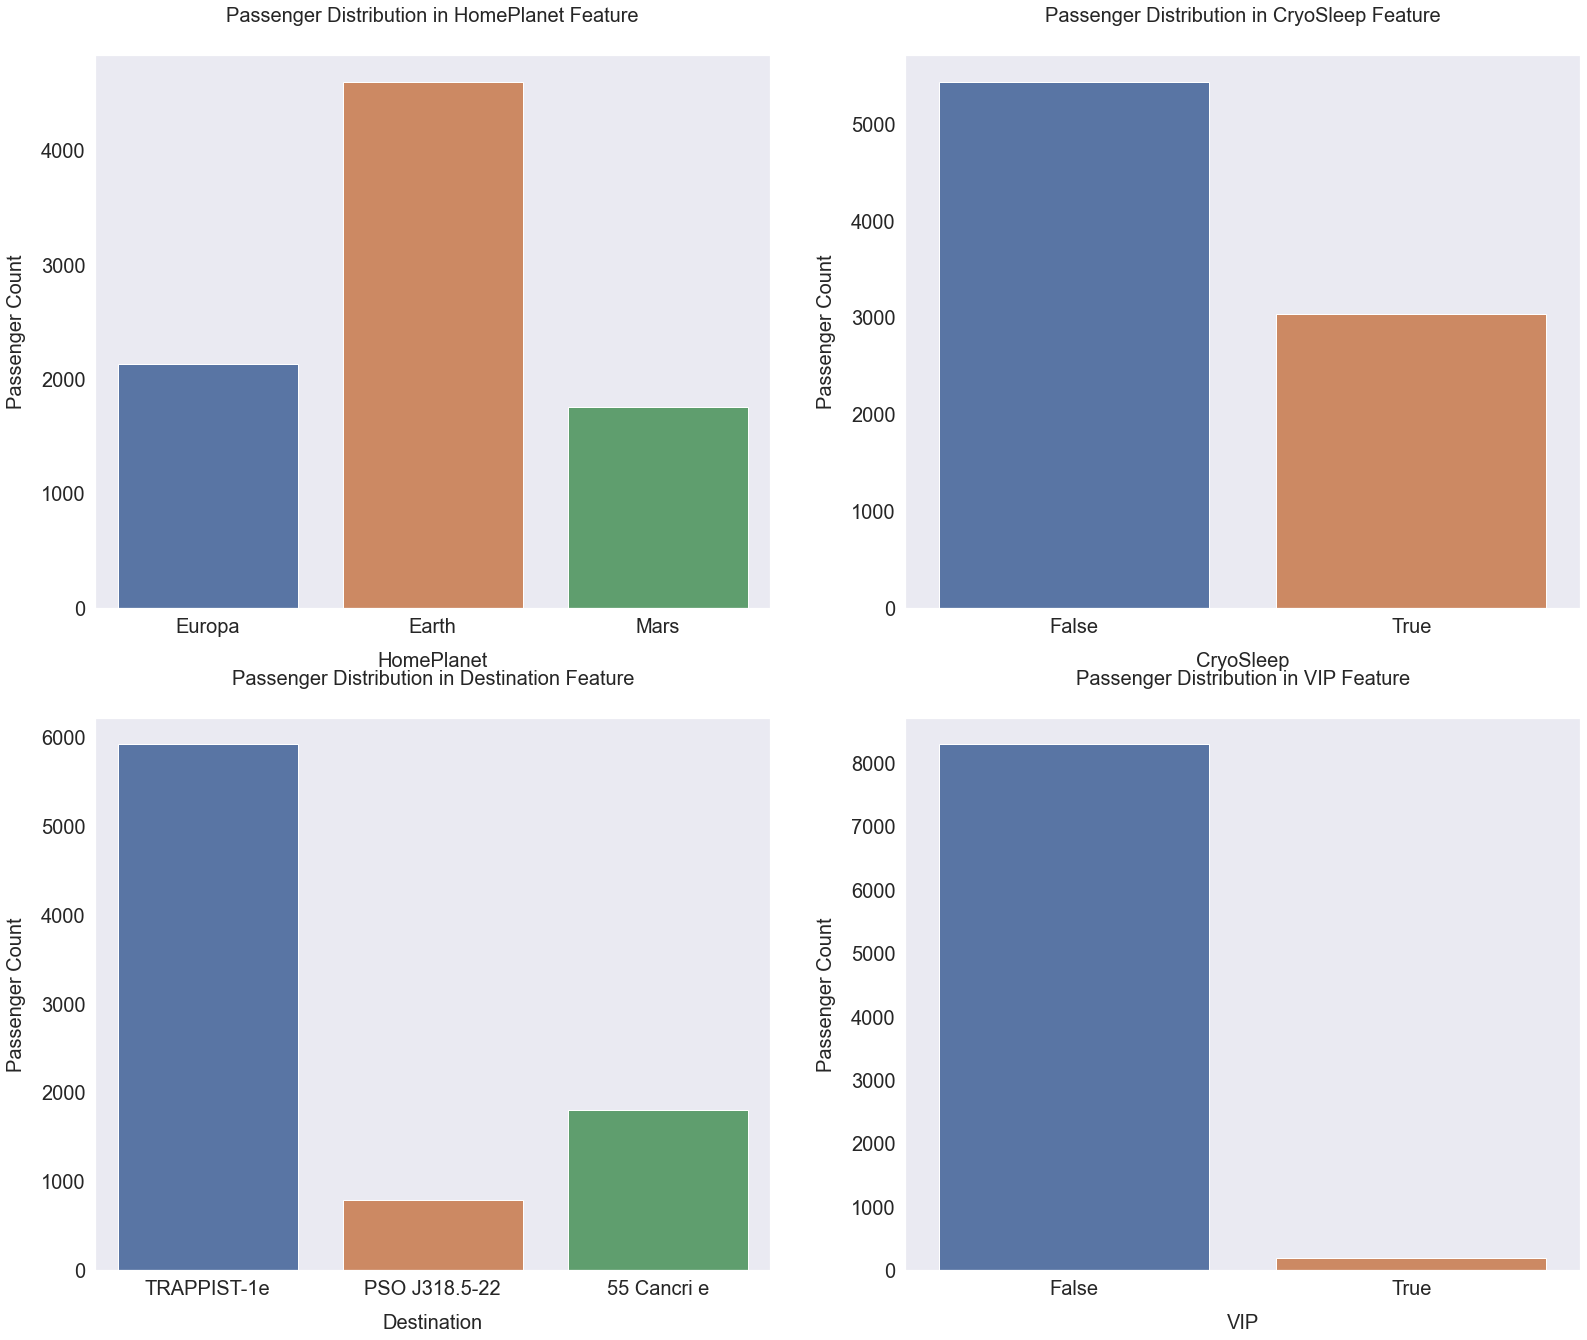

In [14]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.title('Passenger Distribution in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

`Transported`

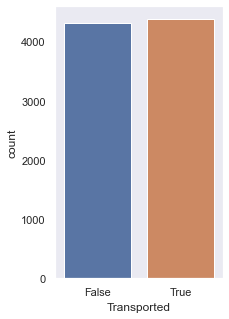

True     4378
False    4315
Name: Transported, dtype: int64

In [15]:
plt.figure(figsize=(3, 5))
sns.countplot(x='Transported', data=train)
plt.show()

train['Transported'].value_counts()

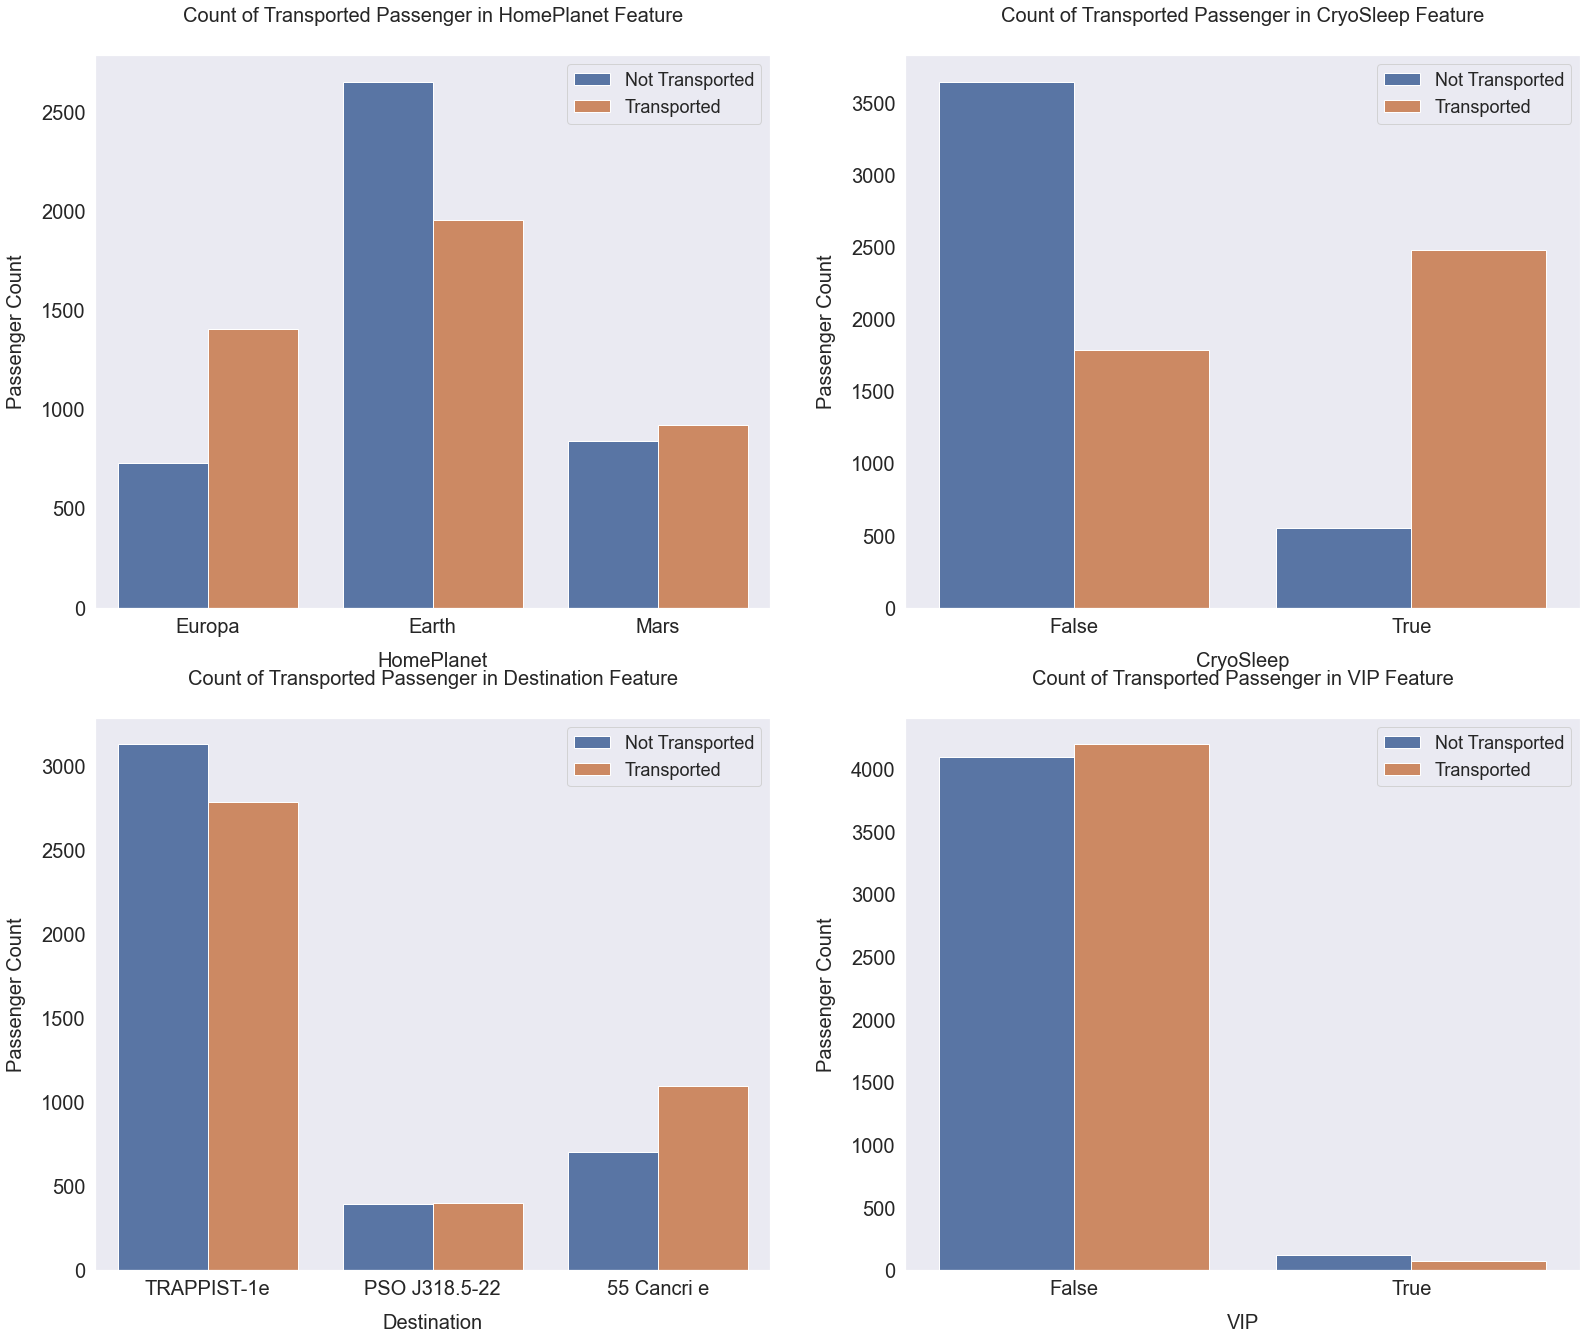

In [16]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, hue='Transported', data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Transported', 'Transported'], loc='upper right', prop={'size': 18})
    plt.title('Count of Transported Passenger in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

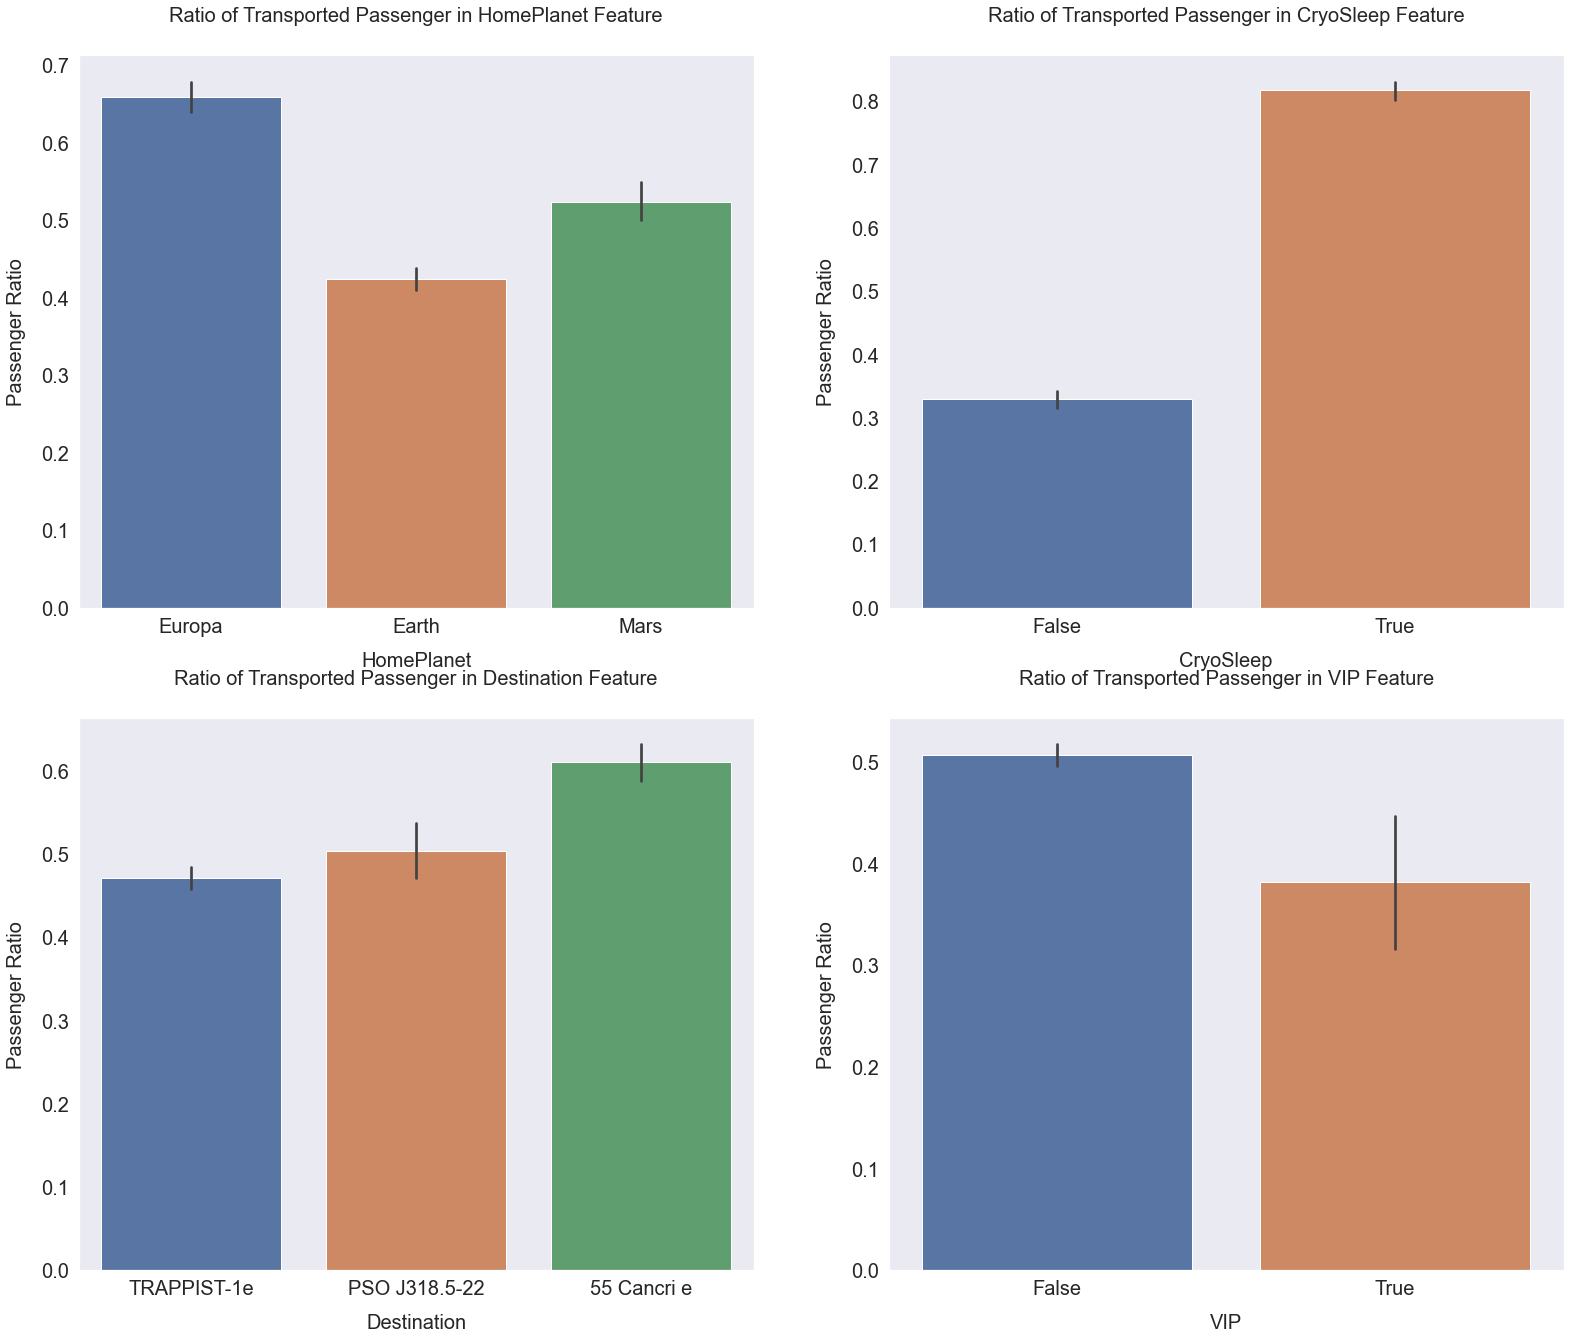

In [17]:
cat_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 15))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 2, i)
    sns.barplot(x=feature, y='Transported', data=train)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Ratio', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.title('Ratio of Transported Passenger in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

`Passenger ID`

In [18]:
train['PassengerId'].value_counts().head()

4466_01    1
7310_01    1
5301_02    1
6603_01    1
9081_01    1
Name: PassengerId, dtype: int64

In [19]:
train[['PassengerGroup', 'PassengerNo']] = train['PassengerId'].str.split('_', expand=True)

In [20]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


In [21]:
train['PassengerGroup'].value_counts().head(20)

9081    8
8988    8
4005    8
4498    8
8956    8
8796    8
8728    8
5133    8
8168    8
0984    8
5885    8
4256    8
5756    8
6787    7
4172    7
0571    7
6302    7
5814    7
8770    7
0221    7
Name: PassengerGroup, dtype: int64

In [22]:
train[train['PassengerGroup'] == '8796']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNo
8228,8796_01,Earth,False,G/1418/S,TRAPPIST-1e,6.0,False,0.0,0.0,0.0,0.0,0.0,Daisya Traverdy,True,8796,01
8229,8796_02,Earth,False,F/1704/S,TRAPPIST-1e,14.0,False,588.0,144.0,1.0,0.0,168.0,Hillie Jorden,False,8796,02
8230,8796_03,Earth,True,G/1418/S,TRAPPIST-1e,0.0,False,NaN,0.0,0.0,0.0,0.0,Joya Jorden,False,8796,03
8231,8796_04,Earth,True,G/1418/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,0.0,0.0,Gailia Jorden,False,8796,04
8232,8796_05,Earth,False,F/1704/S,TRAPPIST-1e,37.0,False,63.0,0.0,0.0,0.0,661.0,Berna Jorden,False,8796,05
8233,8796_06,Earth,False,F/1704/S,TRAPPIST-1e,14.0,False,0.0,1427.0,148.0,0.0,7.0,Felice Traverdy,True,8796,06
8234,8796_07,Earth,False,F/1704/S,TRAPPIST-1e,34.0,False,14.0,748.0,0.0,41.0,0.0,Stene Bakerson,True,8796,07
8235,8796_08,Earth,True,G/1418/S,55 Cancri e,3.0,False,0.0,0.0,0.0,0.0,0.0,Dondy Traverdy,True,8796,08


In [23]:
train[train['PassengerGroup'] == '8728']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNo
8162,8728_01,Earth,NaN,F/1798/P,TRAPPIST-1e,32.0,False,258.0,500.0,3.0,15.0,128.0,Justie Fulloydez,True,8728,01
8163,8728_02,Earth,False,G/1416/P,TRAPPIST-1e,55.0,False,694.0,0.0,1.0,87.0,0.0,Eilan Fulloydez,False,8728,02
8164,8728_03,Earth,False,F/1798/P,TRAPPIST-1e,23.0,False,1254.0,0.0,45.0,0.0,0.0,Fanna Fulloydez,False,8728,03
8165,8728_04,Earth,False,F/1798/P,PSO J318.5-22,38.0,False,647.0,23.0,1.0,0.0,0.0,Ginald Fulloydez,False,8728,04
8166,8728_05,Earth,True,G/1416/P,55 Cancri e,18.0,False,0.0,0.0,0.0,0.0,0.0,Weslie Fulloydez,True,8728,05
8167,8728_06,Earth,True,G/1416/P,PSO J318.5-22,32.0,False,0.0,0.0,0.0,0.0,0.0,Kendy Fulloydez,False,8728,06
8168,8728_07,Earth,False,NaN,TRAPPIST-1e,44.0,False,266.0,3.0,2.0,0.0,748.0,Delley Fulloydez,False,8728,07
8169,8728_08,Earth,False,G/1416/P,TRAPPIST-1e,62.0,False,0.0,592.0,164.0,0.0,0.0,Franda Fulloydez,True,8728,08


In [24]:
train[train['PassengerGroup'] == '5756']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNo
5385,5756_01,Earth,False,F/1194/P,TRAPPIST-1e,51.0,False,542.0,0.0,360.0,0.0,0.0,Card Dicksons,False,5756,01
5386,5756_02,Earth,False,F/1194/P,TRAPPIST-1e,42.0,False,439.0,0.0,0.0,0.0,254.0,Billia Briggston,False,5756,02
5387,5756_03,Earth,False,F/1194/P,PSO J318.5-22,19.0,False,5.0,0.0,0.0,716.0,0.0,Inerry Briggston,False,5756,03
5388,5756_04,Earth,NaN,F/1194/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,NaN,False,5756,04
5389,5756_05,Earth,True,F/1194/P,TRAPPIST-1e,19.0,False,0.0,0.0,0.0,NaN,0.0,Fery Briggston,True,5756,05
5390,5756_06,Earth,False,F/1194/P,PSO J318.5-22,22.0,False,158.0,0.0,476.0,0.0,26.0,Karena Briggston,False,5756,06
5391,5756_07,Earth,False,NaN,TRAPPIST-1e,25.0,False,12.0,6.0,2817.0,342.0,0.0,Shanie Garden,False,5756,07
5392,5756_08,Earth,False,F/1194/P,PSO J318.5-22,31.0,False,11.0,0.0,0.0,1912.0,1120.0,Wenise Briggston,False,5756,08


People in a group are often family members, but **not** always, as we can see from their last name. Also, they share the same cabin.

`HomePlanet`

In [25]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [26]:
train[train['HomePlanet'] == 'Europa'].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNo
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,01
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,0008,02


In [27]:
train[train['HomePlanet'] == 'Mars'].head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNo
12,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True,0009,01
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False,0014,01
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True,0016,01
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,0.0,0.0,NaN,False,0022,01
31,0028_01,Mars,False,F/8/P,TRAPPIST-1e,43.0,False,1125.0,0.0,136.0,48.0,0.0,Ceros Mare,False,0028,01


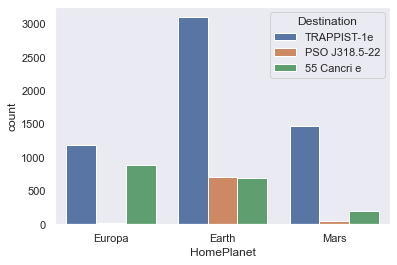

HomePlanet  Destination  
Earth       55 Cancri e       690
            PSO J318.5-22     712
            TRAPPIST-1e      3101
Europa      55 Cancri e       886
            PSO J318.5-22      19
            TRAPPIST-1e      1189
Mars        55 Cancri e       193
            PSO J318.5-22      49
            TRAPPIST-1e      1475
Name: Destination, dtype: int64

In [28]:
sns.countplot(x='HomePlanet', hue='Destination', data=train)
plt.show()

train.groupby(['HomePlanet', 'Destination']).Destination.agg(len)

In [29]:
train['HomePlanet'].value_counts()

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

- Earth E, F & G
- Europa A, B, C, D, E, T
- Mars D, E, F

`Cryo Sleep`

In [30]:
train['CryoSleep'].unique()

array([False, True, nan], dtype=object)

In [31]:
train[train['CryoSleep'] == True].head(20)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNo
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006,02
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,01
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,0008,02
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,0.0,0.0,Alus Upead,True,0016,01
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,0.0,0.0,Almary Brantuarez,False,0020,01
22,0020_02,Earth,True,E/0/S,55 Cancri e,49.0,False,0.0,0.0,0.0,0.0,0.0,Glendy Brantuarez,False,0020,02
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False,0020,03
25,0020_05,Earth,True,E/0/S,PSO J318.5-22,1.0,False,NaN,0.0,0.0,0.0,0.0,Mael Brantuarez,False,0020,05
28,0024_01,Europa,True,C/2/S,TRAPPIST-1e,62.0,False,0.0,0.0,NaN,0.0,0.0,Penton Fullided,True,0024,01
36,0034_01,Europa,True,D/1/S,55 Cancri e,28.0,False,0.0,0.0,0.0,0.0,0.0,Ziba Oingwhedly,True,0034,01


Passengers in cryo sleep spend **nothing** in luxury facilities. I will discover more about this findings because it seems useful for predict the NaN value in **CryoSleep** column.

`Cabin`

**Cabin** is the cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

In [32]:
train['Cabin'].value_counts().head()

G/734/S     8
C/137/S     7
F/1411/P    7
G/1368/P    7
F/1194/P    7
Name: Cabin, dtype: int64

In [33]:
train[train['Cabin'] == 'G/734/S']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerGroup,PassengerNo
4221,4498_01,Earth,False,G/734/S,55 Cancri e,11.0,False,0.0,0.0,0.0,0.0,0.0,Valex Munozanson,False,4498,01
4222,4498_02,Earth,True,G/734/S,PSO J318.5-22,14.0,False,0.0,0.0,0.0,0.0,0.0,Loise Beckeetter,False,4498,02
4223,4498_03,Earth,True,G/734/S,PSO J318.5-22,4.0,False,0.0,0.0,0.0,0.0,0.0,Lorie Beckeetter,True,4498,03
4224,4498_04,Earth,False,G/734/S,TRAPPIST-1e,11.0,False,0.0,0.0,0.0,0.0,NaN,Dandy Munozanson,False,4498,04
4225,4498_05,Earth,True,G/734/S,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,0.0,0.0,Karay Beckeetter,True,4498,05
4226,4498_06,Earth,False,G/734/S,TRAPPIST-1e,15.0,False,0.0,893.0,0.0,0.0,0.0,Line Munozanson,True,4498,06
4227,4498_07,Earth,False,G/734/S,TRAPPIST-1e,39.0,False,0.0,2.0,0.0,69.0,836.0,Dary Mallerez,False,4498,07
4228,4498_08,Earth,False,G/734/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Kendy Munozanson,False,4498,08


In [34]:
train[['Deck', 'Number', 'Side']] = train['Cabin'].str.split('/', expand=True)

In [35]:
train['Deck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: Deck, dtype: int64

In [36]:
train.groupby(['Transported', 'Deck']).Deck.agg(len)

Transported  Deck
False        A        129
             B        207
             C        239
             D        271
             E        563
             F       1565
             G       1238
             T          4
True         A        127
             B        572
             C        508
             D        207
             E        313
             F       1229
             G       1321
             T          1
Name: Deck, dtype: int64

In [37]:
train['Number'].value_counts().head()

82    28
86    22
19    22
97    21
56    21
Name: Number, dtype: int64

In [38]:
train['Side'].value_counts()

S    4288
P    4206
Name: Side, dtype: int64

In [39]:
train.groupby(['Transported', 'Side']).Side.agg(len)

Transported  Side
False        P       2308
             S       1908
True         P       1898
             S       2380
Name: Side, dtype: int64

In [40]:
train.groupby(['CryoSleep', 'Side']).Side.agg(len)

CryoSleep  Side
False      P       2673
           S       2658
True       P       1420
           S       1533
Name: Side, dtype: int64

`Destination`

In [41]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

`Transported`

`Age`

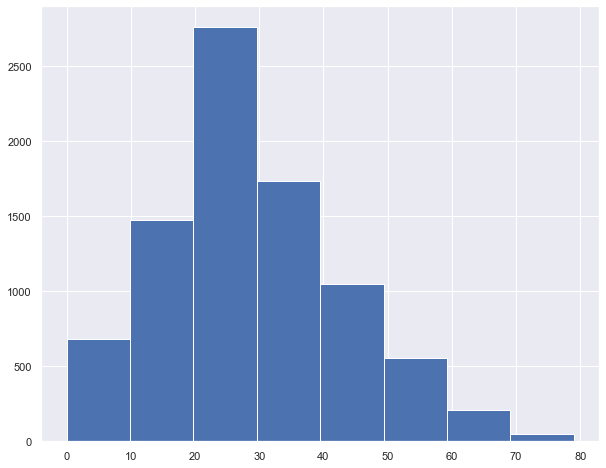

In [42]:
plt.figure(figsize = (10, 8))

train['Age'].hist(bins=8)
plt.show()

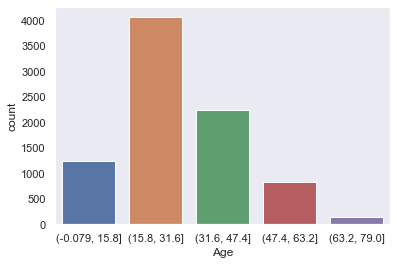

In [43]:
age_bin5 = pd.cut(train['Age'], 5)

sns.countplot(x=age_bin5)
plt.show()

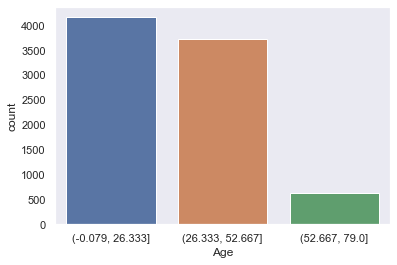

In [44]:
age_bin3 = pd.cut(train['Age'], 3)

sns.countplot(x=age_bin3)
plt.show()

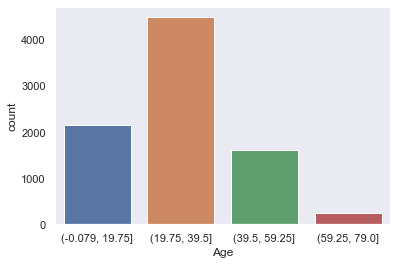

In [45]:
age_bin4 = pd.cut(train['Age'], 4)

sns.countplot(x=age_bin4)
plt.show()

In [46]:
age_bin5.value_counts()

(15.8, 31.6]      4065
(31.6, 47.4]      2243
(-0.079, 15.8]    1240
(47.4, 63.2]       830
(63.2, 79.0]       136
Name: Age, dtype: int64

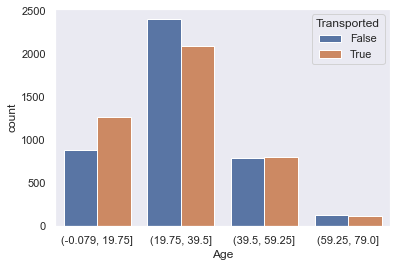

In [47]:
sns.countplot(x=age_bin4, hue=train['Transported'])
plt.show()

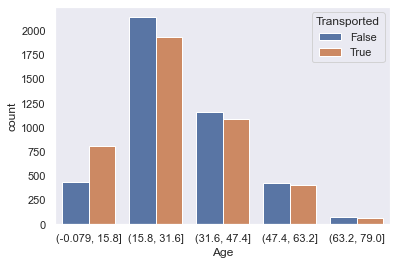

In [48]:
sns.countplot(x=age_bin5, hue=train['Transported'])
plt.show()

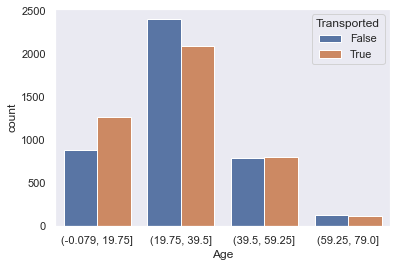

In [49]:
sns.countplot(x=age_bin4, hue=train['Transported'])
plt.show()

In [50]:
train['Age_binned'] = pd.cut(train['Age'], 4)
                             
test['Age_binned'] = pd.cut(test['Age'], 4)

In [51]:
# Data transformation

label = LabelEncoder()

train['AgeBin_Code_5'] = label.fit_transform(train['Age_binned'])

test['AgeBin_Code_5'] = label.fit_transform(test['Age_binned'])

In [52]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Age_binned,AgeBin_Code_5
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,"(19.75, 39.5]",1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,"(-0.079, 19.75]",0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,"(19.75, 39.5]",1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,"(19.75, 39.5]",1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,"(19.75, 39.5]",1


In [53]:
train['Age_binned'].value_counts()

(19.75, 39.5]      4497
(-0.079, 19.75]    2158
(39.5, 59.25]      1605
(59.25, 79.0]       254
Name: Age_binned, dtype: int64

In [54]:
train[train['Age_binned'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,PassengerGroup,PassengerNo,Deck,Number,Side,Age_binned,AgeBin_Code_5
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,...,0.0,Elaney Hubbarton,False,0052,01,G,6,S,NaN,4
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,...,0.0,Cinst Binie,False,0068,01,E,4,S,NaN,4
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,...,0.0,Billya Hubbarrison,True,0149,01,G,27,S,NaN,4
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,NaN,...,443.0,Vegas Embleng,True,0202,02,A,2,P,NaN,4
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,...,122.0,Nuson Brugashed,True,0206,01,C,9,S,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,8835_01,Earth,True,G/1425/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,...,0.0,Shalle Bartines,False,8835,01,G,1425,S,NaN,4
8301,8862_03,Europa,True,C/329/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,...,0.0,Alchib Myling,True,8862,03,C,329,S,NaN,4
8374,8956_04,Earth,False,G/1453/P,TRAPPIST-1e,NaN,False,194.0,1.0,10.0,...,0.0,Krisa Bonnondry,False,8956,04,G,1453,P,NaN,4
8407,8988_01,Earth,True,G/1448/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,...,0.0,Maen Fowlesterez,True,8988,01,G,1448,S,NaN,4


`Luxury Amenities`

Luxury Amenities consist of RoomService, FoodCourt, ShoppingMall, Spa and VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities. For simplicity, I will join all these columns into one.

In [55]:
train['Spend'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

In [56]:
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,PassengerNo,Deck,Number,Side,Age_binned,AgeBin_Code_5,Spend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0001,01,B,0,P,"(19.75, 39.5]",1,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,0002,01,F,0,S,"(19.75, 39.5]",1,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,0003,01,A,0,S,"(39.5, 59.25]",2,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,0003,02,A,0,S,"(19.75, 39.5]",1,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,0004,01,F,1,S,"(-0.079, 19.75]",0,1091.0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,...,Sandie Hinetthews,True,0005,01,F,0,P,"(39.5, 59.25]",2,774.0
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,...,Billex Jacostaffey,True,0006,01,F,2,S,"(19.75, 39.5]",1,1584.0
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,...,Candra Jacostaffey,True,0006,02,G,0,S,"(19.75, 39.5]",1,NaN
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,...,Andona Beston,True,0007,01,F,3,S,"(19.75, 39.5]",1,1018.0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,Erraiam Flatic,True,0008,01,B,1,P,"(-0.079, 19.75]",0,0.0


In [57]:
train[(train['CryoSleep'] == True) & (train['Spend'] >= 1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,PassengerNo,Deck,Number,Side,Age_binned,AgeBin_Code_5,Spend


In [58]:
train[(train['CryoSleep'].isnull()) & (train['Spend'] >= 1)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,PassengerNo,Deck,Number,Side,Age_binned,AgeBin_Code_5,Spend
98,0105_01,Earth,NaN,F/21/P,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,...,Carry Cleachrand,False,0105,01,F,21,P,"(19.75, 39.5]",1,703.0
104,0110_02,Europa,NaN,B/5/P,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,...,Aldeba Bootious,False,0110,02,B,5,P,"(39.5, 59.25]",2,2018.0
152,0173_01,Earth,NaN,E/11/S,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,...,Hilip Grifford,True,0173,01,E,11,S,"(39.5, 59.25]",2,990.0
224,0241_01,Europa,NaN,E/11/P,55 Cancri e,33.0,False,0.0,1249.0,0.0,...,Alas Dischod,False,0241,01,E,11,P,"(19.75, 39.5]",1,7177.0
314,0348_02,Mars,NaN,NaN,TRAPPIST-1e,36.0,False,520.0,0.0,1865.0,...,Weet Mane,True,0348,02,NaN,NaN,NaN,"(19.75, 39.5]",1,2385.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8181,8743_01,Earth,NaN,F/1802/P,55 Cancri e,19.0,False,179.0,16.0,246.0,...,Isa Villenson,False,8743,01,F,1802,P,"(-0.079, 19.75]",0,721.0
8420,8993_01,Earth,NaN,F/1844/P,PSO J318.5-22,27.0,False,32.0,8.0,5.0,...,Juliey Hahnstonsen,False,8993,01,F,1844,P,"(19.75, 39.5]",1,651.0
8455,9031_01,Earth,NaN,G/1455/S,TRAPPIST-1e,51.0,False,0.0,0.0,689.0,...,Noria Bairdyork,False,9031,01,G,1455,S,"(39.5, 59.25]",2,721.0
8591,9170_01,Earth,NaN,E/587/P,TRAPPIST-1e,33.0,False,1060.0,403.0,1.0,...,Jeandy Ewins,False,9170,01,E,587,P,"(19.75, 39.5]",1,1609.0


In [59]:
train[(train['Spend'] == 0) & (train['CryoSleep'].isnull())]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,PassengerNo,Deck,Number,Side,Age_binned,AgeBin_Code_5,Spend
92,0099_02,Earth,NaN,G/12/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,...,Thewis Connelson,True,0099,02,G,12,P,"(-0.079, 19.75]",0,0.0
175,0198_01,Earth,NaN,G/30/P,PSO J318.5-22,52.0,False,0.0,0.0,0.0,...,Jeroy Cookson,True,0198,01,G,30,P,"(39.5, 59.25]",2,0.0
266,0290_03,Europa,NaN,B/7/S,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,...,Dhenar Excialing,True,0290,03,B,7,S,"(39.5, 59.25]",2,0.0
392,0433_01,Europa,NaN,B/20/P,55 Cancri e,27.0,False,0.0,0.0,0.0,...,Hekark Mormonized,True,0433,01,B,20,P,"(19.75, 39.5]",1,0.0
626,0653_01,Mars,NaN,E/45/S,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Rionk Paska,True,0653,01,E,45,S,"(19.75, 39.5]",1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8501,9076_01,Earth,NaN,G/1461/S,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,...,Shawne Simonsents,False,9076,01,G,1461,S,"(19.75, 39.5]",1,0.0
8612,9193_01,Earth,NaN,G/1483/S,PSO J318.5-22,35.0,False,0.0,0.0,0.0,...,Camily Howence,False,9193,01,G,1483,S,"(19.75, 39.5]",1,0.0
8620,9197_01,Europa,NaN,C/308/P,55 Cancri e,44.0,False,0.0,0.0,0.0,...,Bellus Platch,True,9197,01,C,308,P,"(39.5, 59.25]",2,0.0
8651,9227_05,Earth,NaN,G/1498/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,...,Hard Hinglendez,False,9227,05,G,1498,P,"(-0.079, 19.75]",0,0.0


In [60]:
train[(train['Spend'].isnull()) & (train['CryoSleep'].isnull())]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,PassengerNo,Deck,Number,Side,Age_binned,AgeBin_Code_5,Spend
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,...,Rohs Pead,True,0115,01,F,24,P,"(19.75, 39.5]",1,NaN
1531,1624_03,Earth,NaN,G/250/S,TRAPPIST-1e,4.0,False,0.0,0.0,0.0,...,Eristy Barbes,True,1624,03,G,250,S,"(-0.079, 19.75]",0,NaN
2134,2291_01,Earth,NaN,G/365/S,55 Cancri e,6.0,False,0.0,0.0,0.0,...,Patoya Pittler,False,2291,01,G,365,S,"(-0.079, 19.75]",0,NaN
2231,2390_01,Earth,NaN,G/385/P,TRAPPIST-1e,24.0,False,0.0,0.0,NaN,...,Joelan Burrilllins,False,2390,01,G,385,P,"(19.75, 39.5]",1,NaN
2402,2584_01,Earth,NaN,G/417/P,PSO J318.5-22,21.0,False,0.0,0.0,NaN,...,Lilace Woodwardy,False,2584,01,G,417,P,"(19.75, 39.5]",1,NaN
2639,2822_02,Earth,NaN,G/450/S,TRAPPIST-1e,5.0,NaN,0.0,0.0,0.0,...,Salley Harverez,False,2822,02,G,450,S,"(-0.079, 19.75]",0,NaN
3072,3315_01,Earth,NaN,F/627/S,TRAPPIST-1e,15.0,False,10.0,0.0,99.0,...,NaN,False,3315,01,F,627,S,"(-0.079, 19.75]",0,NaN
3232,3476_01,Earth,NaN,G/571/P,55 Cancri e,4.0,False,0.0,NaN,0.0,...,Gabrie Joycerton,True,3476,01,G,571,P,"(-0.079, 19.75]",0,NaN
3850,4127_01,Europa,NaN,B/130/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,...,Dsch Ainserfle,True,4127,01,B,130,P,"(19.75, 39.5]",1,NaN
4129,4404_01,Earth,NaN,G/726/P,TRAPPIST-1e,38.0,False,NaN,2.0,404.0,...,Lis Scotterkins,False,4404,01,G,726,P,"(19.75, 39.5]",1,NaN


In [61]:
train[train['Spend'] == 0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,PassengerNo,Deck,Number,Side,Age_binned,AgeBin_Code_5,Spend
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,0001,01,B,0,P,"(19.75, 39.5]",1,0.0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,...,Erraiam Flatic,True,0008,01,B,1,P,"(-0.079, 19.75]",0,0.0
18,0016_01,Mars,True,F/5/P,TRAPPIST-1e,45.0,False,0.0,0.0,0.0,...,Alus Upead,True,0016,01,F,5,P,"(39.5, 59.25]",2,0.0
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,...,Lyde Brighttt,True,0017,01,G,0,P,"(-0.079, 19.75]",0,0.0
21,0020_01,Earth,True,E/0/S,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,...,Almary Brantuarez,False,0020,01,E,0,S,"(-0.079, 19.75]",0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8680,9268_01,Earth,True,G/1505/P,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,...,Agnesa Baldson,True,9268,01,G,1505,P,"(19.75, 39.5]",1,0.0
8681,9270_01,Earth,True,G/1497/S,55 Cancri e,33.0,False,0.0,0.0,0.0,...,Lan Mckinsond,True,9270,01,G,1497,S,"(19.75, 39.5]",1,0.0
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,...,Chelsa Bullisey,True,9274,01,G,1508,P,"(19.75, 39.5]",1,0.0
8685,9275_01,Europa,False,A/97/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,...,Polaton Conable,True,9275,01,A,97,P,"(-0.079, 19.75]",0,0.0


This finding confirms that passengers in cryo sleep do not incur any expenses for any luxury amenities, which makes sense since they are confined to their cabin. So it can be concluded, if Spend is 0 then CryoSleep is True and if Spend is more than 0 then CryoSleep is False.

In [62]:
train['RoomService'].fillna(0, inplace=True)
train['FoodCourt'].fillna(0, inplace=True)
train['ShoppingMall'].fillna(0, inplace=True)
train['Spa'].fillna(0, inplace=True)
train['VRDeck'].fillna(0, inplace=True)

In [63]:
train['Spend'] = train['RoomService'] + train['FoodCourt'] + train['ShoppingMall'] + train['Spa'] + train['VRDeck']

For test dataset

In [64]:
test['RoomService'].fillna(0, inplace=True)
test['FoodCourt'].fillna(0, inplace=True)
test['ShoppingMall'].fillna(0, inplace=True)
test['Spa'].fillna(0, inplace=True)
test['VRDeck'].fillna(0, inplace=True)

In [65]:
test['Spend'] = test['RoomService'] + test['FoodCourt'] + test['ShoppingMall'] + test['Spa'] + test['VRDeck']

`VIP`

In [66]:
train['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [67]:
train[['VIP', 'Transported']].value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
dtype: int64

In [68]:
train[['VIP', 'CryoSleep']].value_counts()

VIP    CryoSleep
False  False        5143
       True         2941
True   False         175
       True           21
dtype: int64

In [69]:
train['VIP'].isnull().sum()

203

In [70]:
train[['VIP', 'Spend']].head(20)

,VIP,Spend
0,False,0.0
1,False,736.0
2,True,10383.0
3,False,5176.0
4,False,1091.0
5,False,774.0
6,False,1584.0
7,False,0.0
8,False,1018.0
9,False,0.0


`Name`

In [71]:
train['Name'].isnull().sum()

200

In [72]:
train[train['Name'].isnull()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,PassengerGroup,PassengerNo,Deck,Number,Side,Age_binned,AgeBin_Code_5,Spend
27,0022_01,Mars,False,D/0/P,TRAPPIST-1e,21.0,False,980.0,2.0,69.0,...,NaN,False,0022,01,D,0,P,"(19.75, 39.5]",1,1051.0
58,0064_01,Mars,True,F/14/S,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,...,NaN,True,0064,01,F,14,S,"(-0.079, 19.75]",0,0.0
65,0069_01,Earth,False,F/16/S,TRAPPIST-1e,42.0,False,887.0,0.0,9.0,...,NaN,True,0069,01,F,16,S,"(39.5, 59.25]",2,902.0
77,0082_03,Mars,False,F/16/P,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,...,NaN,True,0082,03,F,16,P,"(-0.079, 19.75]",0,0.0
101,0108_02,Earth,False,G/19/S,TRAPPIST-1e,31.0,False,562.0,0.0,326.0,...,NaN,False,0108,02,G,19,S,"(19.75, 39.5]",1,888.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8629,9205_02,Europa,True,B/300/P,TRAPPIST-1e,15.0,False,0.0,0.0,0.0,...,NaN,True,9205,02,B,300,P,"(-0.079, 19.75]",0,0.0
8631,9208_01,Earth,True,G/1485/S,TRAPPIST-1e,35.0,False,0.0,0.0,0.0,...,NaN,True,9208,01,G,1485,S,"(19.75, 39.5]",1,0.0
8636,9218_01,Europa,True,B/353/S,55 Cancri e,43.0,False,0.0,0.0,0.0,...,NaN,True,9218,01,B,353,S,"(39.5, 59.25]",2,0.0
8652,9230_01,Europa,False,C/342/S,TRAPPIST-1e,36.0,True,0.0,5600.0,715.0,...,NaN,True,9230,01,C,342,S,"(19.75, 39.5]",1,10154.0


For **Name** null values I will not doing anything because the information from this column is not needed.

## Summary

- Out of 8693 passengers only 4378(~50.36%) was transported
- People in a group are often family members, but **not** always, as we can see from their last name. Also, they share the same cabin.
- Passengers who are confined to their cabins (Cryo Sleep) are more likely to be transported
- Passengers in cryo sleep spend nothing in luxury facilities. With Spend feature engineering, we can assume that every passenger who are spend nothing are confined in their cabin (Cryo Sleep)

## Dealing with Missing Values

In [73]:
train.isnull().sum()

PassengerId         0
HomePlanet        201
CryoSleep         217
Cabin             199
Destination       182
Age               179
VIP               203
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              200
Transported         0
PassengerGroup      0
PassengerNo         0
Deck              199
Number            199
Side              199
Age_binned        179
AgeBin_Code_5       0
Spend               0
dtype: int64

`HomePlanet`

In [74]:
train['HomePlanet'] = train['HomePlanet'].fillna('Earth')

test['HomePlanet'] = test['HomePlanet'].fillna('Earth')

`CryoSleep`

In [75]:
def myfunc(cryosleep, spend):
    if pd.isnull(cryosleep) and spend == 0:
        cryosleep = True
    elif pd.isnull(cryosleep) and spend > 0:
        cryosleep = False
    else:
        cryosleep = cryosleep
    return cryosleep

In [76]:
train['CryoSleep_filled'] = train.apply(lambda x: myfunc(x['CryoSleep'], x['Spend']), axis=1)

test['CryoSleep_filled'] = test.apply(lambda x: myfunc(x['CryoSleep'], x['Spend']), axis=1)

`Destination`

In [77]:
train['Destination'].mode()

0    TRAPPIST-1e
dtype: object

In [78]:
train['Destination'] = train['Destination'].fillna('TRAPPIST-1e')

test['Destination'] = test['Destination'].fillna('TRAPPIST-1e')

`VIP`

In [79]:
train['VIP'].mode()

0    False
dtype: object

In [80]:
train['VIP'] = train['VIP'].fillna(False)

test['VIP'] = test['VIP'].fillna(False)

`AgeBin_Code_5`

In [81]:
train['AgeBin_Code_5'].fillna(train['AgeBin_Code_5'].mode, inplace=True)

test['AgeBin_Code_5'].fillna(test['AgeBin_Code_5'].mode, inplace=True)

## Data Transformation

In [82]:
train['HomePlanet'] = train['HomePlanet'].map({'Europa':0, 'Earth':1, 'Mars':2})

test['HomePlanet'] = test['HomePlanet'].map({'Europa':0, 'Earth':1, 'Mars':2})

In [83]:
train['CryoSleep_filled'] = train['CryoSleep_filled'].map({False:0, True:1})

test['CryoSleep_filled'] = test['CryoSleep_filled'].map({False:0, True:1})

In [84]:
train['Destination'] = train['Destination'].map({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})

test['Destination'] = test['Destination'].map({'TRAPPIST-1e':0, 'PSO J318.5-22':1, '55 Cancri e':2})

In [85]:
train['VIP'] = train['VIP'].map({False:0, True:1})

test['VIP'] = test['VIP'].map({False:0, True:1})

In [86]:
train['Transported'] = train['Transported'].map({False:0, True:1})

## Machine Learning Model

In [87]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'PassengerGroup', 'PassengerNo', 'Deck',
       'Number', 'Side', 'Age_binned', 'AgeBin_Code_5', 'Spend',
       'CryoSleep_filled'],
      dtype='object')

In [98]:
X_train = train.drop(['PassengerId', 'CryoSleep', 'Cabin', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 
                     'VRDeck', 'Name', 'Transported', 'PassengerGroup', 'PassengerNo', 'Deck', 
                      'Number', 'Side', 'Age_binned', 'Spend', 'VIP'], axis=1)

X_train.head()

,HomePlanet,Destination,AgeBin_Code_5,CryoSleep_filled
0,0,0,1,0
1,1,0,1,0
2,0,0,2,0
3,0,0,1,0
4,1,0,0,0


In [99]:
y_train = train['Transported']

In [100]:
model = RandomForestClassifier(n_estimators=200, random_state=2)

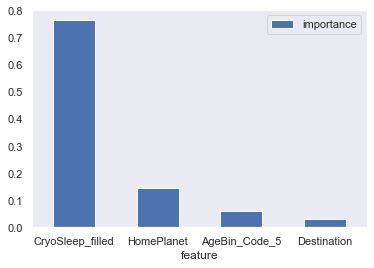

In [101]:
model.fit(X_train,y_train)
importance = pd.DataFrame({'feature':X_train.columns, 'importance': np.round(model.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=0)
plt.show()

In [ ]:
grid_param = {
 'n_estimators': [100, 200, 300],
 'criterion':['gini', 'entropy'],
 'min_samples_split': [2, 10, 20],
 'min_samples_leaf': [1, 5],
 'bootstrap': [True, False],
}

gd_sr = GridSearchCV(estimator = model,
 param_grid = grid_param,
 scoring = 'accuracy',
 cv = 5,
 n_jobs = -1)

gd_sr.fit(X_train, y_train)
best_parameters = gd_sr.best_params_
print(best_parameters)

In [96]:
model = RandomForestClassifier(n_estimators = 200, bootstrap = True, criterion = 'gini', 
                               min_samples_leaf = 1, min_samples_split = 10, random_state = 2)

In [102]:
all_accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv=5)
all_accuracies
all_accuracies.mean()

0.7227667449051773